# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.


### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/seamusjames/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

    Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Different units. GPA is on a (roughly) max 4.0 scale. GRE is roughly 800. The difference between scores is much higher than the difference between gpas.  

#### Question 4. Drop data points with missing data


In [16]:
df = df_raw.copy()
df = df.dropna()

admit    gre    gpa  prestige
0    False  False  False     False
1    False  False  False     False
2    False  False  False     False
3    False  False  False     False
4    False  False  False     False
5    False  False  False     False
6    False  False  False     False
7    False  False  False     False
8    False  False  False     False
9    False  False  False     False
10   False  False  False     False
11   False  False  False     False
12   False  False  False     False
13   False  False  False     False
14   False  False  False     False
15   False  False  False     False
16   False  False  False     False
17   False  False  False     False
18   False  False  False     False
19   False  False  False     False
20   False  False  False     False
21   False  False  False     False
22   False  False  False     False
23   False  False  False     False
24   False  False  False     False
25   False  False  False     False
26   False  False  False     False
27   False  False  False     False
28   False  False  False     False
29   False  False  False     False
..     ...    ...    ...       ...
370  False  False  False     False
371  False  False  False     False
372  False  False  False     False
373  False  False  False     False
374  False  False  False     False
375  False  False  False     False
376  False  False  False     False
377  False  False  False     False
378  False  False  False     False
379  False  False  False     False
380  False  False  False     False
381  False  False  False     False
382  False  False  False     False
383  False  False  False     False
384  False  False  False     False
385  False  False  False     False
386  False  False  False     False
387  False  False  False     False
388  False  False  False     False
389  False  False  False     False
390  False  False  False     False
391  False  False  False     False
392  False  False  False     False
393  False  False  False     False
394  False  False  False     False
395  False  False  False     False
396  False  False  False     False
397  False  False  False     False
398  False  False  False     False
399  False  False  False     False

[400 rows x 4 columns]

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Check the number of rows. Are the counts equal to or lower than the individual column counts from the raw data? There's no more raw data.

#### Question 6. Create box plots for GRE and GPA

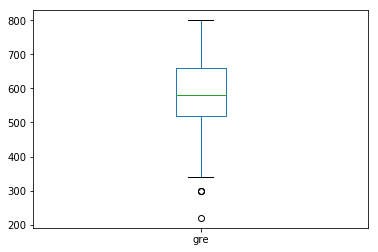

In [18]:
#boxplot 1
df['gre'].plot.box()

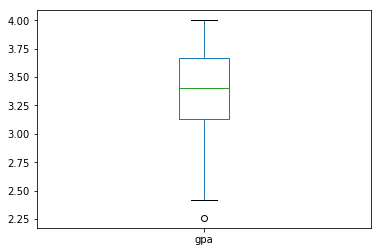

In [19]:
#boxplot 2 
df['gpa'].plot.box()

#### Question 7. What do this plots show?

Answer: They give us a visual of the 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11134d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111724290>]], dtype=object)

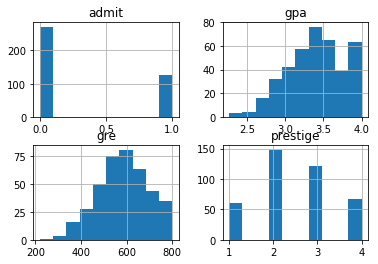

In [25]:
# plot the distribution of each variable 
df.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would for the GRE scores, but only for that metric. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Definitely. The units are drastically different. We can't compare the raw data. 

#### Question 11. Which of our variables are potentially colinear? 

In [26]:
# create a correlation matrix for the data
df.corr()

admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000

#### Question 12. What did you find?

Answer: Not much. GPA and GRE have a little correlation, but we look pretty good. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First, get dummies for the prestige column. Next, try creating a linear regression with GridSearch using r-squared as the metric, and fit to `admit` as the target. Next, try creating a ridge model to see if we can get a better model fit. To do that, we can try a few different `solver` parameters to see if any provide a better fit than gradient descent.  

#### Question 14. What is your hypothesis? 

Answer: We can predict the admission rate through some combination of GPA, prestige, and GRE score. 

## Knowledge Review Questions

1. What is test error and train error?  
    Training error is the errors we get when we test our model on data where we know the actual answer. Test error is the error we get when applying the model to the real world. 
  
2. What are ways to mitigate a situation where you have low train error but high test error?  
    Adjust your training set. Choose a new model. Stop applying that model to cases where it's not predictive.   
  
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?  
    Not sure what you mean by ordinary linear regression here, but some params for common linear regression models: Alphas, normalize, solver method (gradient descent by default I believe), weights.  
  
4. What package would you use to explore these parameters easily and find the best model?  
GridSearchCV ftw.  
  
5. What is the difference between Lasso and Ridge regression?  
    Lasso reduces the number of parameters to only those that are most significant. Ridge reduces the variance in our betas.  
    6a. When do you use which?  
    Use Lasso when you have a lot of parameters and you want to isolate only the most valuable ones. Use ridge when you want to include as many parameters as possible, but weight their value in proportion to their effect.  
      
6. Bonus: Explore alternatives to dropping obervations with missing data.

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?  
Increasing the alphas reduces the impact of individual coefficients by bringing them closer to 0.  
  
2. How do you deal with multi-colinearity when performing linear regression?
Look at a correlation matrix and drop columns that have high collinearity. Use ridge regression as it corrects for that automatically. 
  
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?  
Distance formula is the type of equation used to calculate the distance between the test point and the other points in the training set. Different distances can provide different performance gains or losses.